In [1]:
import sys, datetime
from qick.asm_v2 import QickSweep1D

sys.path.append("../Libraries") # replace this with your location of the Libraries folder
from rabi_length_sweep import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load Autonics TM4 Driver


  0%|          | 0/2000000 [00:00<?, ?it/s]

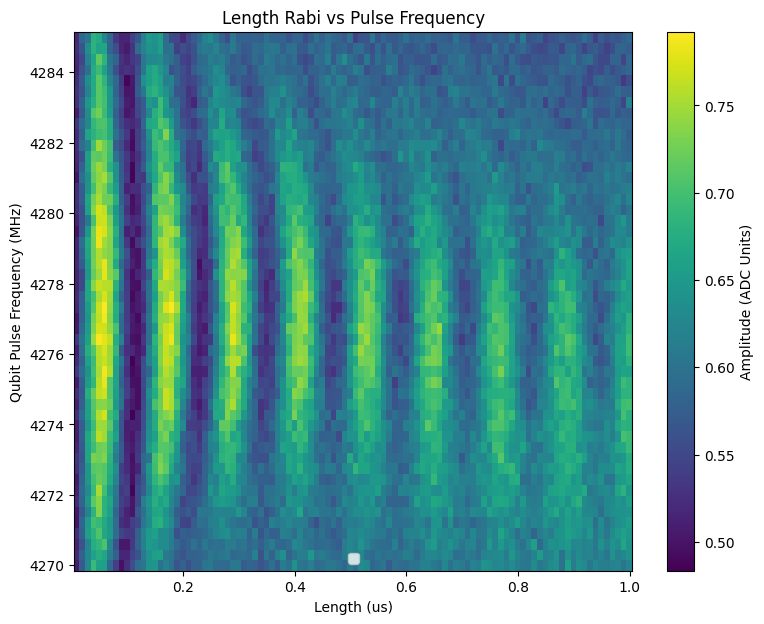

In [3]:
date = str(datetime.datetime.now().strftime('%Y_%m_%d'))
time = str(datetime.datetime.now().strftime('%H;%M;%S'))

datapath = f'G:\\My Drive\\chatot\\data\\rabi_length_sweep\\{date}\\{time}\\' # replace this with your data location

config_file = f"..\\..\\..\\..\\cfg\\llosta.json" # replace this with your config

meas = rabi_length_sweep(path=datapath, config_file=config_file)

min_length = 0.01
max_length = 1
min_freq = 4270
max_freq = 4285

meas.cfg.expt = {
    "n_avg": 400,
    "res_freq": 5990.45,
    "res_gain": 0.03,
    "res_pulse_len": 5, 
    "res_phase": 0,
    "qubit_pulse_len": QickSweep1D('length_loop', min_length, max_length), 
    "qubit_gain": 0.2,
    "qubit_freq": QickSweep1D('freq_loop', min_freq, max_freq),
    "qubit_phase": 0,
    "trig_offset": 0.5,
    "relaxation_time": 200,
    "freq_steps": 50,
    "min_length": min_length,
    "max_length": max_length,
    "length_steps": 100,
    "min_freq": min_freq,
    "max_freq": max_freq
}

data = meas.acquire()
meas.display(save=False)
#meas.savedata()

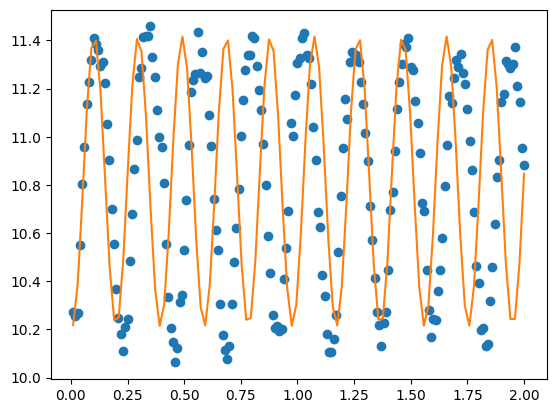

In [9]:
mag = np.abs(data['I'][24] + 1j*data['Q'][24])
xlim=12
ls = data['ls']
plt.plot(ls, mag, 'o')
from scipy.optimize import curve_fit
def cos_fn(x, A, B, C, D):
    return A*np.cos(B*x + C) + D
params, cov = curve_fit(cos_fn, ls[:xlim], mag[:xlim])
xs = np.linspace(ls[0], ls[-1], 100)
ys = cos_fn(xs, *params)
plt.plot(xs, ys)